In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=0)

In [3]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)
colormap = plt.cm.get_cmap('viridis', len(y_pred))

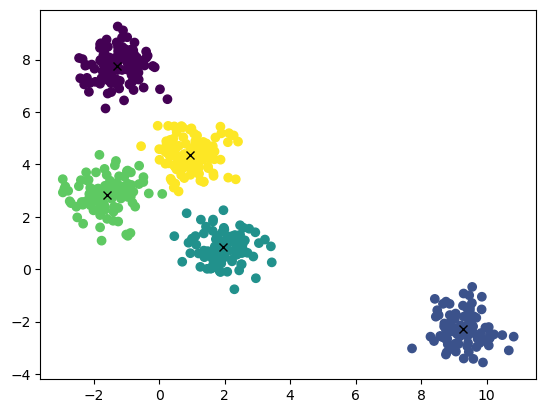

In [16]:
plt.scatter(X[:,0],X[:,1], c=y_pred, cmap=colormap)
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'kx')
plt.plot()
plt.show()

#### hard clustering

In [13]:
X_new = np.array([[-2, 7], [-2, 1], [2, 3], [3, 1], [8, -1]])
y_new_pred = kmeans.predict(X_new)
y_new_pred

array([0, 3, 4, 2, 1], dtype=int32)

#### soft clustering
each instance is given a similarity score for each cluster

In [14]:
kmeans.transform(X_new)

array([[ 1.0453632 , 14.61225879,  7.32376875,  4.1670454 ,  3.9570275 ],
       [ 6.79595192, 11.75647483,  3.95726993,  1.89132371,  4.47731859],
       [ 5.77862906,  8.99931366,  2.16529242,  3.61493792,  1.72102724],
       [ 7.99892863,  7.09256396,  1.05906391,  4.96948619,  3.93945271],
       [12.75976026,  1.81468762,  6.3185478 , 10.35464919,  8.85748075]])

In [17]:
def cluster_inertia_qty(x, y, a, b):
    inertia_scores = []
    for i in range(a,b):
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(x)
        inertia_scores.append(model.inertia_)
    return inertia_scores


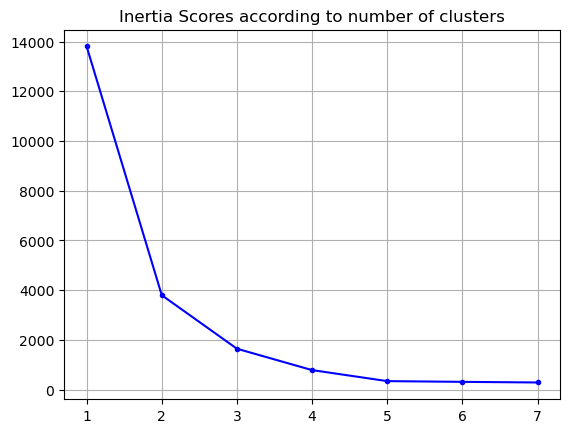

In [20]:
scores = cluster_inertia_qty(X, y, 1, 8)
plt.plot(range(1,8), scores, 'b.-')
plt.title("Inertia Scores according to number of clusters")
plt.grid()
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

In [23]:
def cluster_silhouette_qty(x, y, a, b):
    silhouette_scores = []
    for i in range(a,b):
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(X)
        silhouette_scores.append(silhouette_score(X, model.labels_))
    return silhouette_scores

In [25]:
silhouette_score(X, kmeans.labels_)

0.7173642175642293

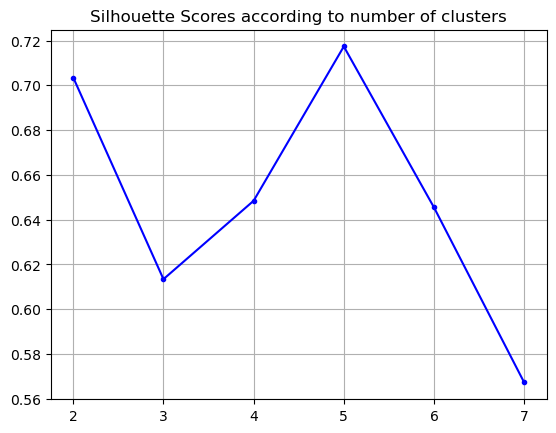

In [27]:
sil_scores = cluster_silhouette_qty(X, y, 2, 8)
plt.plot(range(2,8), sil_scores, 'b.-')
plt.title("Silhouette Scores according to number of clusters")
plt.grid()
plt.show()